¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Revisión 2</b> <a class="tocSkip"></a>

¡Hola, Angel! Gran trabajo con los ajustes, agregaste una introducción para agregar contexto del análisis a desarrollar en el ejercicio, completaste valores nulos con la mediana, ajustante el periodo en tus gráficas y desarrollaste la prueba complementaria de levene! Solamente te dejo algunos comentarios adicionales para los errores que sigues presentando
</div>

<div class="alert alert-block alert-success">
<b>Revisión 2</b> <a class="tocSkip"></a>

¡Hola, Angel! Excelente trabajo con los ajustes, completaste la los valores nulos con la mediana, eliminaste los valores ausentes y reduciste el periodo en las gráficas para mostrar resultados actualizados. 
    
Sigue con el excelente trabajo!    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola, Angel! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Proyecto Integrado 1 -Analisis de venta de videojuegos-

## Introduccion

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Es diciembre de 2016 y estás planeando una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Diccionario de datos

 - `Name` (Nombre de videojuego)
 - `Platform` (Plataforma)
 - `Year_of_Release` (Año de lanzamiento)
 - `Genre` (Género) 
 - `NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses) 
 - `EU_sales` (ventas en Europa en millones de dólares estadounidenses) 
 - `JP_sales` (ventas en Japón en millones de dólares estadounidenses) 
 - `Other_sales` (ventas en otros países en millones de dólares estadounidenses) 
 - `Critic_Score` (máximo de 100) 
 - `User_Score` (máximo de 10) 
 - `Rating` (ESRB)

## Carga de librerias y conjunto de datos

In [1]:
#Carga de liberias
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
#Carga de base de datos
df_games = pd.read_csv('/datasets/games.csv')
print(df_games.sample(5))
print()
df_games.info()

                                        Name Platform  Year_of_Release  \
1347                                BioShock      PS3           2008.0   
11509  Harry Potter and the Sorcerer's Stone       GC           2003.0   
13978                         Minna no Chizu      PSP           2006.0   
11674               Resident Evil 3: Nemesis       GC           2003.0   
6971                         Starsky & Hutch       XB           2003.0   

         Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
1347   Shooter      0.75      0.46      0.01         0.20          94.0   
11509   Action      0.06      0.02      0.00         0.00          62.0   
13978     Misc      0.00      0.00      0.04         0.00           NaN   
11674   Action      0.06      0.02      0.00         0.00          62.0   
6971    Racing      0.17      0.05      0.00         0.01           NaN   

      User_Score Rating  
1347         8.7      M  
11509        8.3      E  
13978        NaN    NaN  



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias. Además, el uso de info() nos ayuda a dar información general sobre las bases con las que vamos a trabajar

</div>

In [3]:
#Identificacion de valores ausentes
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Comment:** Se identifican pocos valores ausentes en columnas como Name, Year of release y Genre, sin embargo hay muchos ausentes en columnas como Critic Score, User Score y Rating. Asi mismo se tienen tipos de datos incorrectos entre columnas numericas y de texto. La estrategia sera ir de columna por columna para analizar y ajustar correctamente los datos.  

## Procesamiento de los datos

In [4]:
#Cambiar los nombres de las columnas a minusculas
column_names = list(df_games.columns)
new_names = [name.lower() for name in column_names]
df_games.columns = new_names
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con el uso de lower(), como aprendiste en cursos anteriores es muy util cuando hacemos limpieza en las variables de las bases

</div>

### Columna 'Name'

In [5]:
#Valores en columna name
df_games['name'].value_counts(dropna=False)

Need for Speed: Most Wanted                              12
LEGO Marvel Super Heroes                                  9
FIFA 14                                                   9
Madden NFL 07                                             9
Ratatouille                                               9
                                                         ..
Yokai Watch 2 Ganso/Honke                                 1
Ken to Mahou to Gakuen Mono. 2                            1
Chopper Command                                           1
Shin Chan Contra ¡Los Plastas!                            1
Jim Henson's Muppets in Spy Muppets: License to Croak     1
Name: name, Length: 11560, dtype: int64

In [6]:
#Cambiar nombres de Videojuegos a minusculas
df_games['name'] = df_games['name'].str.lower()
df_games['name'] = df_games['name'].str.strip()
df_games['name'].value_counts(dropna=False)

need for speed: most wanted       12
fifa 14                            9
madden nfl 07                      9
lego marvel super heroes           9
ratatouille                        9
                                  ..
fashion week jr. designer          1
saihai no yukue                    1
super smash bros. melee            1
anima - gate of memories           1
rugby league team manager 2015     1
Name: name, Length: 11560, dtype: int64

In [7]:
#Validacion de valores ausentes
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Comment**: los valores ausentes en la columna 'Name' son los mismos que se presentan en la columna 'Genre'. Adicional no se cuenta con valores de Critica, Usuario ni Rating, y son juegos de 1993, por lo que se supone no serian relevantes en proyecciones actuales. Se procede a eliminarlos.

In [8]:
#Eliminacion de valores ausentes
df_games.dropna(subset= ['name'], inplace=True)
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating



<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Angel, en este caso aparece error dado que en el argumento subset debemos de colocar una lista y la forma en la que lo colocamos no esta en formato de lista. Te puedes guiar del siguiente ejemplo:
    
    df_games.dropna(subset=['name'], inplace=True)

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>


Listo, gracias por la aclaracion, es curioso que en Visual Studio no te marca ciertos errores pero aqui Jupyter si. </div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste. Justo en Jupyter te puedes guiar de lo que marcan los errores para resolverlos

### Columna 'Platform'

In [9]:
#Valores en columna Platform
df_games['platform'].value_counts(dropna=False).sort_index(ascending=True)

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

**Comment**: Se identifican multiples plataformas que pertenecen a diferentes compañias de videojuego. Agruparlas podria permitir trabajar con valores mas reducidos en lugar de tantas variaciones.

In [10]:
#Agrupar Plataformas en grupos de Compañias de Videojuegos 
def company (x):
		if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
			return "Nintendo"
		elif x in ['PC','PCFX']:
			return "PC"
		elif x in ['PS','PS2','PS3','PS4','PSP','PSV']:
			return "PlayStation"
		elif x in ['X360','XB','XOne']:
			return "XBox"
		else:
			return "Other"
df_games['company'] = df_games['platform'].apply(company)
df_games['company'].value_counts(dropna=False)

PlayStation    6720
Nintendo       6270
XBox           2333
PC              975
Other           415
Name: company, dtype: int64

### Columna 'Year_of_release'

In [11]:
#Visualizacion de valores en 'year_of_release'
df_games['year_of_release'].value_counts(dropna=False).sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: year_of_release, dtype: int64

**Comment**: El tipo de valor es flotante, se procedera a cambiar a entero para procesar los años de esta manera. Para esto hay que asignar un 'valor absurdo' en los datos ausentes para poder hacer el cambio. 

In [12]:
#Llenado de valores ausentes con -1 y filtrado para evitar sesgos en la informacion
df_games['year_of_release'] = df_games['year_of_release'].fillna(-1)
df_games['year_of_release'].value_counts(dropna=False).sort_index()

-1.0        269
 1980.0       9
 1981.0      46
 1982.0      36
 1983.0      17
 1984.0      14
 1985.0      14
 1986.0      21
 1987.0      16
 1988.0      15
 1989.0      17
 1990.0      16
 1991.0      41
 1992.0      43
 1993.0      60
 1994.0     121
 1995.0     219
 1996.0     263
 1997.0     289
 1998.0     379
 1999.0     338
 2000.0     350
 2001.0     482
 2002.0     829
 2003.0     775
 2004.0     762
 2005.0     939
 2006.0    1006
 2007.0    1197
 2008.0    1427
 2009.0    1426
 2010.0    1255
 2011.0    1136
 2012.0     653
 2013.0     544
 2014.0     581
 2015.0     606
 2016.0     502
Name: year_of_release, dtype: int64

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

In [13]:
#Cambio de tipo de dato de flotante a entero
df_games['year_of_release'] = df_games['year_of_release'].astype('int')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  company          16713 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


### Columna 'Genre'

In [14]:
#Visualizacion de valores en columna genre
df_games['genre'].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

**Comment:** No se visualiza cambio o ajuste necesario en la columna Genre

### Columnas 'Sales'

In [15]:
#Creacion de columna con la suma de todas las ventas
df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales
8399,tokimeki memorial: private collection,PS,1996,Misc,0.00,0.00,0.16,0.01,NaN,NaN,NaN,PlayStation,0.17
4352,defender ii,2600,1987,Shooter,0.42,0.02,0.00,0.00,NaN,NaN,NaN,Other,0.44
5552,chicken riot,Wii,2010,Action,0.14,0.15,0.00,0.03,NaN,tbd,T,Nintendo,0.32
14202,mame goma: shiro to kuro no meikyuu,3DS,2012,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Nintendo,0.03
13226,furu furu park,Wii,2007,Misc,0.05,0.00,0.00,0.00,43.0,4.8,E10+,Nintendo,0.05
14008,sherlock holmes: secret of the silver earring,Wii,2010,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,NaN,Nintendo,0.03
12368,mirror's edge catalyst,PC,2016,Platform,0.01,0.05,0.00,0.00,74.0,4.4,T,PC,0.06
4864,star wars the clone wars: republic heroes,DS,2009,Action,0.22,0.14,0.00,0.04,NaN,5.3,E10+,Nintendo,0.40
7321,ncaa march madness 08,X360,2007,Sports,0.20,0.00,0.00,0.02,69.0,tbd,E,XBox,0.22
6389,battle arena toshinden 3,PS,1996,Fighting,0.06,0.04,0.14,0.02,NaN,NaN,NaN,PlayStation,0.26


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Angel! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de criticos y usuarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos con la mediana para no sesgar nuestros resultados
</div>

<div class="alert alert-block alert-info">
    <b>Respuesta del estudiante:</b> <a class="tocSkip"></a>
    
Se realiza llenado de valores ausentes en columnas 'Critic_Score' y 'User_Score' completando con la mediana.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajustes!
    
   

</div>

**Comment:** Se genera una nueva columna con la suma de las ventas de las 3 regiones.

### Columna 'Critic_Score'

In [16]:
#Visualizacion de valores en columna critic_score
df_games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [17]:
# Identificacion de valores ausentes
df_games['critic_score'].isna().sum()

8576

In [18]:
#Identificacion de la mediana
df_games['critic_score'].median()

71.0

In [19]:
#Llenado de valores ausentes con la mediana
df_games['critic_score'] = df_games['critic_score'].fillna(70.0)
df_games['critic_score'].isna().sum()

0

In [20]:
#Visualizacion de valores en columna critic_score
df_games['critic_score'].describe()

count    16713.000000
mean        69.497397
std          9.738841
min         13.000000
25%         70.000000
50%         70.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

**Comment**: no se visualizan cambios requeridos para el manejo de la informacion. Se decide mantener los valores NaN ya que se supone fueron juegos que no se calificaron en su momento.

### Columna 'User_Score'

In [21]:
#Visualizacion de valores en columna user_score
print(df_games['user_score'].describe())
print()
df_games['user_score'].value_counts(dropna=False)

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object



NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.5       2
1.9       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

**Comment**: se visualizan gran cantidad de valores clasificados como tbd. Se supone que tienen el mismo tratamiento que NaN, y se infiere que fueron juegos que no se clasificaron. Se procede a hacer el cambio de tbd a NaN y cambio en el tipo de dato de objeto a flotante. Tambien se realiza multiplicacion por 10 de los valores de user_score para que tengan la misma base 1/100 que los valores de critic_score.

In [22]:
#Cambio de valores tbd a Nan
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan
df_games['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
9.6       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [23]:
#Cambio de tipo de dato de objeto a flotante
df_games['user_score'] = df_games.user_score.astype(float)
df_games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [24]:
#Alineacion a base 1/100 igual que critic_score 
df_games['user_score'] = df_games['user_score']*10
df_games['user_score'].describe()

count    7590.000000
mean       71.250461
std        15.000061
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64

In [25]:
# Identificacion de valores ausentes
df_games['user_score'].isna().sum()

9123

In [26]:
#Identificacion de la mediana
df_games['user_score'].median()

75.0

In [27]:
#Llenado de valores ausentes con la mediana
df_games['user_score'] = df_games['user_score'].fillna(75.0)
df_games['user_score'].isna().sum()

0

In [28]:
#Visualizacion de valores en columna critic_score
df_games['user_score'].describe()

count    16713.000000
mean        73.297194
std         10.279096
min          0.000000
25%         75.000000
50%         75.000000
75%         75.000000
max         97.000000
Name: user_score, dtype: float64

### Columna 'Rating'

In [29]:
#Visualizacion de valores de columna 'rating'
df_games['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**Comment**: 6k+ valores estan ausentes y se infiere que los juegos no se les asigno un rating en su momento, por lo que se decide mantener el NaN y categorizar como 'Rating Pending' al igual que los RP. El significado de los valores del rating no es claro, por lo que se decide generar una nueva columna con la descripcion completa.

In [30]:
#Generar columna con la descripcion completa de categorias de columna 'rating'
def rating (x):
	if x in ['E', 'EC', 'K-A']:
		return 'Everyone'
	elif x == 'T':
		return 'Teens'
	elif x == 'M':
		return 'Mature'
	elif x == 'E10+':
		return 'Everyone 10y+'
	elif x == 'AO':
		return 'Adult Only'
	else:
		return 'Rating Pending'
df_games['rating2'] = df_games['rating'].apply(rating)
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
12010,harry potter and the sorcerer's stone,XB,2003,Action,0.05,0.02,0.00,0.00,59.0,60.0,E,XBox,0.07,Everyone
5367,motorstorm: arctic edge,PS2,2009,Racing,0.07,0.03,0.00,0.25,72.0,83.0,T,PlayStation,0.35,Teens
16388,root double: before crime after days,X360,2012,Action,0.00,0.00,0.01,0.00,70.0,75.0,NaN,XBox,0.01,Rating Pending
8299,yu-gi-oh! zexal world duel carnival,3DS,2013,Misc,0.00,0.08,0.08,0.01,70.0,75.0,NaN,Nintendo,0.17,Rating Pending
2639,rayman origins,X360,2011,Platform,0.38,0.32,0.00,0.08,87.0,82.0,E10+,XBox,0.78,Everyone 10y+


### Revision de duplicados

In [31]:
#Validacion de lineas duplicadas completas 
df_games[df_games.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

In [32]:
#Validacion de duplicados en colummna 'name'
df_games[df_games['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,XBox,16.27,Mature
35,call of duty: black ops ii,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,48.0,M,XBox,13.68,Mature
37,call of duty: modern warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,32.0,M,PlayStation,13.33,Mature
41,call of duty: black ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,64.0,M,PlayStation,12.63,Mature
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,PlayStation,12.62,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,men in black ii: alien escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,70.0,75.0,T,Nintendo,0.01,Teens
16709,score international baja 1000: the official game,PS2,2008,Racing,0.00,0.00,0.00,0.00,70.0,75.0,NaN,PlayStation,0.00,Rating Pending
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,70.0,75.0,NaN,PlayStation,0.01,Rating Pending
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,70.0,75.0,NaN,Nintendo,0.01,Rating Pending


In [33]:
#Validacion de duplicados por un nombre de juego en especifico
df_games.query("name == 'grand theft auto v'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,PlayStation,21.05,Mature
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,XBox,16.27,Mature
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,PlayStation,12.62,Mature
165,grand theft auto v,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,XBox,5.47,Mature
1730,grand theft auto v,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,79.0,M,PC,1.17,Mature


**Comment**: no se presentan duplicados de lineas enteras. Se presentan duplicados en valores del nombre y se identifica que se repiten debido a las diferentes plataformas en los que se publican asi como los años de release, por lo que se procede a buscar duplicados por esas 3 columnas.

In [34]:
#Busqueda de duplicados por columnas 'name', 'platform', 'year_of_release' 
df_games[df_games[['name','platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,55.0,E,PlayStation,0.01,Everyone


In [35]:
#Visualizacion de la linea duplicada
df_games.query("name == 'madden nfl 13' and platform == 'PS3'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,55.0,E,PlayStation,2.56,Everyone
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,55.0,E,PlayStation,0.01,Everyone


In [36]:
#Eliminacion de la fila con index 16230 
df_games = df_games.drop([16230]).reset_index(drop=True)
df_games.query("name == 'madden nfl 13' and platform == 'PS3'")


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,company,total_sales,rating2
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,55.0,E,PlayStation,2.56,Everyone


In [37]:
#Validacion de valor del index 16230
df_games.loc[16230,]

name               geten no hana: yume akari
platform                                 PSP
year_of_release                         2014
genre                                   Misc
na_sales                                 0.0
eu_sales                                 0.0
jp_sales                                0.01
other_sales                              0.0
critic_score                            70.0
user_score                              75.0
rating                                   NaN
company                          PlayStation
total_sales                             0.01
rating2                       Rating Pending
Name: 16230, dtype: object

**Comments**: se procede a eliminar la unica fila duplicada siginficativa 

### Guardar tabla procesada

In [38]:
#Exportar tabla procesada
df_games.to_csv('games_processed.csv', index=False)

## Analisis Exploratorio

In [39]:
#Carga de nueva base de datos con info procesada
df_games_ok = pd.read_csv('games_processed.csv')
df_games_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           9948 non-null   object 
 11  company          16712 non-null  object 
 12  total_sales      16712 non-null  float64
 13  rating2          16712 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


### Publicacion de juegos por año

In [40]:
#Tabla de juegos publicados por año, descartando aquellos sin informacion
games_per_year_pivot = df_games_ok.query("year_of_release != -1").pivot_table(index='year_of_release', values='name', aggfunc='count')
print(games_per_year_pivot)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              652
2013              544
2014              581
2015              606
2016              502


<AxesSubplot:title={'center':'Juegos publicados por año'}, xlabel='Year of release', ylabel='Cantidad de juegos'>

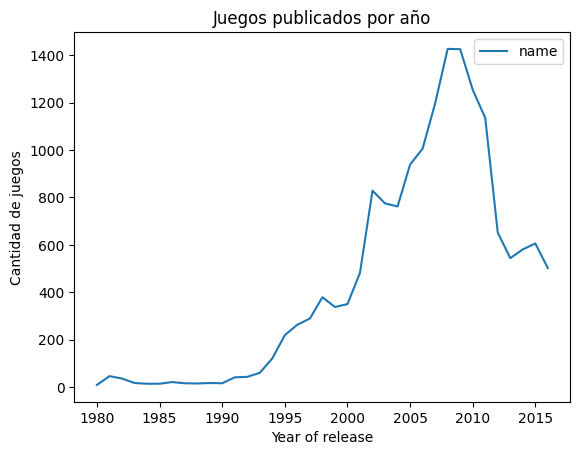

In [41]:
#Grafico lineal de juegos por año
games_per_year_pivot.plot(
		kind = 'line',
		title = 'Juegos publicados por año',
		xlabel = 'Year of release',
        ylabel = 'Cantidad de juegos'
)

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica, nos muestra una idea de como se comporta el mercado de videojuegos en el tiempo
</div>

**Comments**: se carga nuevamente la base de datos con la informacion ya procesada para evitar errores. 
- Se analiza la publicacion de juegos por año desde 1980, encontrando una tendencia significativa de crecimiento a partir del año 1995 y con valores mas significativos al periodo actual a partir del 2000. 
- Hubo un crecimiento exponencial a partir del 2005-2006 con una caida significativa a partir del 2008-2009. En el 2008 hubo una crisis economica mundial que seguramente tambien impacto en el mundo de los videojuegos. 

### Ventas totales por plataforma

In [42]:
#Tabla pivote de ventas totales por plataforma
df_ventas_totales_pivot = df_games_ok.query("year_of_release != -1").pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
print(df_ventas_totales_pivot)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.33
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='Platform', ylabel='Total_Sales'>

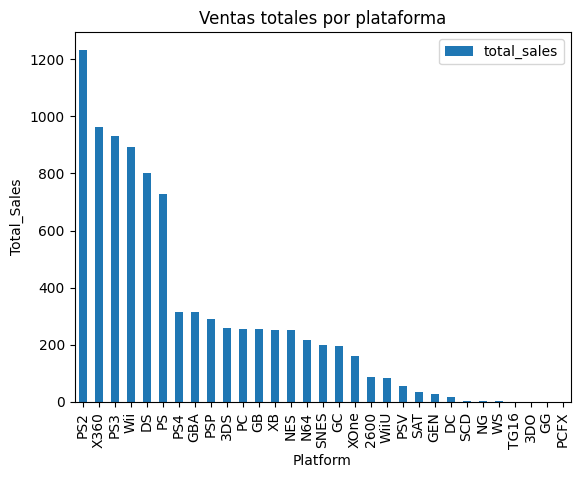

In [43]:
#Grafico de barras de ventas totales por plataforma
df_ventas_totales_pivot.plot(
		kind = 'bar',
		title = 'Ventas totales por plataforma',
		xlabel = 'Platform',
		ylabel = 'Total_Sales'
)

In [44]:
#Segmentacion de Dataframe a top 10 plataformas en ventas
top_10_platforms_ventas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS']
df_games_top_10_ventas = df_games_ok.query("year_of_release != -1").query("platform in @top_10_platforms_ventas")
print(df_games_top_10_ventas)

                                                   name platform  \
0                                            wii sports      Wii   
2                                        mario kart wii      Wii   
3                                     wii sports resort      Wii   
6                                 new super mario bros.       DS   
7                                              wii play      Wii   
...                                                 ...      ...   
16705                woody woodpecker in crazy castle 5      GBA   
16706  score international baja 1000: the official game      PS2   
16707                     samurai warriors: sanada maru      PS3   
16708                                  lma manager 2007     X360   
16710                                  spirits & spells      GBA   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
0                 2006    Sports     41.36     28.96      3.77         8.45   
2                 2008   

In [45]:
#Pivote top 10 plataformas ventas por año
df_ventas_top_10_por_año_pivot = df_games_top_10_ventas.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
print(df_ventas_top_10_por_año_pivot)

platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985               NaN    0.02    NaN     NaN     NaN     NaN     NaN    NaN   
1994               NaN     NaN    NaN    6.03     NaN     NaN     NaN    NaN   
1995               NaN     NaN    NaN   35.96     NaN     NaN     NaN    NaN   
1996               NaN     NaN    NaN   94.70     NaN     NaN     NaN    NaN   
1997               NaN     NaN    NaN  136.17     NaN     NaN     NaN    NaN   
1998               NaN     NaN    NaN  169.49     NaN     NaN     NaN    NaN   
1999               NaN     NaN    NaN  144.53     NaN     NaN     NaN    NaN   
2000               NaN     NaN   0.07   96.37   39.17     NaN     NaN    NaN   
2001               NaN     NaN  61.53   35.59  166.43     NaN     NaN    NaN   
2002               NaN     NaN  74.16    6.67  205.38     NaN     NaN    NaN   
2003               NaN     NaN  56.67   

<AxesSubplot:title={'center':'Volumen de ventas por año por plataforma'}, xlabel='Year_of_release', ylabel='Ventas MUSD'>

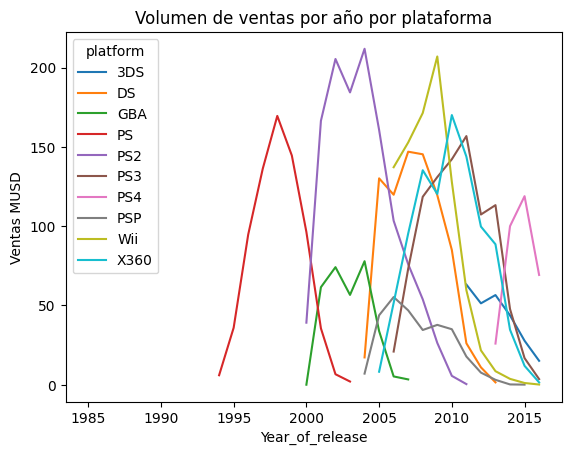

In [46]:
#Grafico tendencias de ventas y caida por plataforma por año
df_ventas_top_10_por_año_pivot.plot(
		kind = 'line',
		title = 'Volumen de ventas por año por plataforma',
		xlabel = 'Year_of_release',
		ylabel = 'Ventas MUSD'
)

In [47]:
#Reduccion de pivote a ventas por plataforma desde 2010
df_ventas_top_10_2010_2016 = df_ventas_top_10_por_año_pivot.query('year_of_release >= 2010')
print(df_ventas_top_10_2010_2016)

platform           3DS     DS  GBA  PS   PS2     PS3     PS4    PSP     Wii  \
year_of_release                                                               
2010               NaN  85.02  NaN NaN  5.64  142.17     NaN  35.04  127.95   
2011             63.20  26.18  NaN NaN  0.45  156.78     NaN  17.82   59.65   
2012             51.36  11.01  NaN NaN   NaN  107.35     NaN   7.69   21.71   
2013             56.57   1.54  NaN NaN   NaN  113.25   25.99   3.14    8.59   
2014             43.76    NaN  NaN NaN   NaN   47.76  100.00   0.24    3.75   
2015             27.78    NaN  NaN NaN   NaN   16.82  118.90   0.12    1.14   
2016             15.14    NaN  NaN NaN   NaN    3.60   69.25    NaN    0.18   

platform           X360  
year_of_release          
2010             170.03  
2011             143.84  
2012              99.74  
2013              88.58  
2014              34.74  
2015              11.96  
2016               1.52  


<AxesSubplot:title={'center':'Volumen de ventas por año por plataforma desde 2010'}, xlabel='Year_of_release', ylabel='Ventas MUSD'>

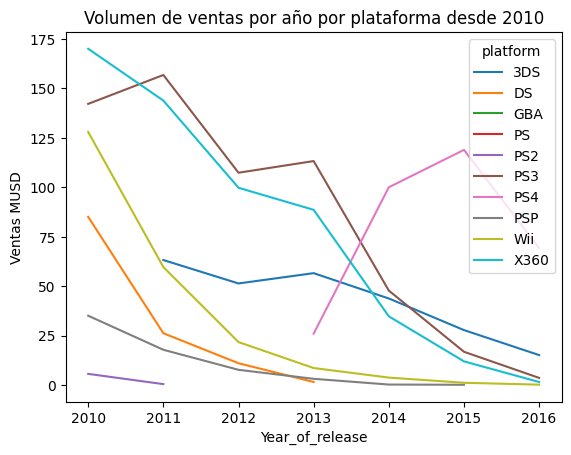

In [48]:
#Grafico tendencias de ventas y caida por plataforma por año desde 2010
df_ventas_top_10_2010_2016.plot(
		kind = 'line',
		title = 'Volumen de ventas por año por plataforma desde 2010',
		xlabel = 'Year_of_release',
		ylabel = 'Ventas MUSD'
)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
    <b>Respuesta del estudiante:</b> <a class="tocSkip"></a>
    
Se segmentan los datos con ventas desde 2010 y se realiza grafica de tendencia de ventas por plataforma 2010-2016.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajustes! Ahora podemos ver los resultados en un periodo actualizado
    
   

</div>

**Comments**: Una vez teniendo identificadas las ventas totales de todas las plataformas, se segmenta la informacion para analizar las top 10 plataformas con mayores vental totales. Se muestra un grafico lineal con las tendencias de venta por plataforma, identificando que la duracion de vida y ventas de las plataformas es entre 8 y 12 años, con un tiempo de traslape entre consolas de la misma compañia de entre 4 y 6 años.

### Top 3 ventas por compañia

In [49]:
# Segmentacion de DataFrame por las top 3 compañias
top_companies = ['Nintendo', 'XBox', 'PlayStation']
df_games_top_companies = df_games_ok.query("year_of_release != -1 and year_of_release >= 1994 and year_of_release <= 2015").query("company in @top_companies")
print(df_games_top_companies.sample(10))

                                                    name platform  \
8835   pokémon: johto photo finish: game boy advance ...      GBA   
6328                                          nba jam 99      N64   
140                                       gears of war 3     X360   
12265                                   natural doctrine      PSV   
14951                                       drome racers      GBA   
11256                                      puss in boots      PS3   
7635                              pro yaky? spirits 2013      PS3   
11573                                           roadkill       XB   
3577                               backyard nfl football      GBA   
4277                                     missile command       PS   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
8835              2004          Misc      0.11      0.04      0.00   
6328              1998        Sports      0.25      0.02      0.00   
140               2011       S

In [50]:
#Pivot ventas por año por compañia
df_pivot_ventas_companies = df_games_top_companies.pivot_table(index='year_of_release', values='total_sales', columns='company', aggfunc='sum')
print(df_pivot_ventas_companies)

company          Nintendo  PlayStation    XBox
year_of_release                               
1994                47.37         6.03     NaN
1995                35.80        35.96     NaN
1996                86.05        94.70     NaN
1997                46.86       136.17     NaN
1998                76.36       169.49     NaN
1999                96.13       144.53     NaN
2000                53.80       135.54    0.99
2001               100.36       202.02   22.26
2002               126.05       212.05   48.01
2003               107.28       186.38   55.04
2004               124.00       218.87   65.42
2005               191.62       204.50   57.33
2006               273.50       179.70   61.66
2007               303.38       196.11   95.96
2008               316.63       206.97  135.44
2009               326.51       195.11  120.29
2010               212.97       182.85  170.03
2011               149.03       179.68  143.84
2012               101.64       131.23   99.74
2013         

<AxesSubplot:title={'center':'Ventas por compañia'}, xlabel='Year of release', ylabel='MUSD'>

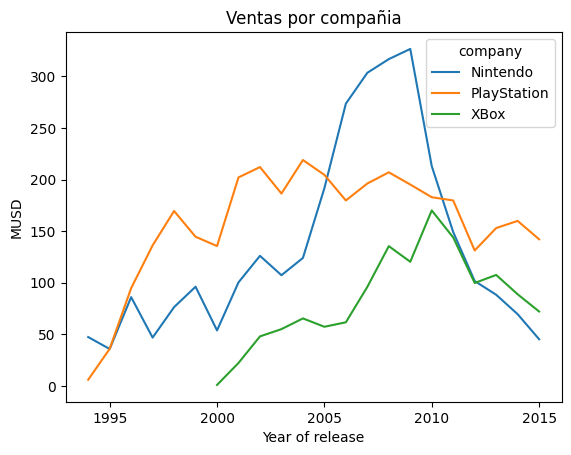

In [51]:
#Grafico de ventas totale por año
df_pivot_ventas_companies.plot(
		kind = 'line',
		title = 'Ventas por compañia',
		xlabel = 'Year of release',
		ylabel = 'MUSD'
)

**Comments**: se decide segmentar el analisis a las 3 compañias mas reconocidas y con mayores ventas historicamente. Los datos se toman para un periodo de tiempo relevante, iniciando a partir de 1994 que es cuando inicia operaciones PlayStation y hasta 2015, ya que los datos de 2016 se visualizan claramente incompletos. 
- Nintendo se muestra inicialmente con un crecimiento constante, seguido de un repunte exponencial cerca del año 2005, cayendo abruptamente a partir del 2009.
- XBox inicia operaciones en el año 2000, con un crecimiento paulatino con un pico en 2010, seguido de caida constante.
- PlayStation es la que se muestra con mayores ventas y estabilidad, teniendo un crecimiento significativo desde su aparicion, manteniendose en ventas superiores a los 100MUSD desde 1997 hasta el 2015.  

<AxesSubplot:title={'center':'Ventas por compañia'}, ylabel='MUSD'>

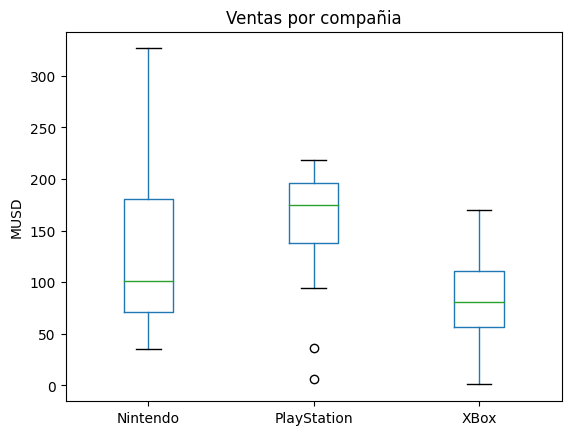

In [52]:
#Boxplot de ventas por compañia
df_pivot_ventas_companies.plot(
		kind = 'box',
		title = 'Ventas por compañia',
		xlabel = 'Year of release',
		ylabel = 'MUSD'
)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo con la gráfica de cajas, Angel. Este tipo de gráficas nos ayuda a comparar resultados entre plataformas con estadisticas muy relevantes. Por otro lado, recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

**Comments**: El diagrama de caja y bigotes muestra que las ventas promedio de PlayStation por año son significativamente mayores que las de sus competidores, estando por encima de los 150MUSD, mientras que los otros dos estan en los 100MUSD o por debajo. Sin embargo el pico mayor de ventas lo ha tenido Nintendo muy por encima de los picos de los otros dos. XBox por su parte, su pico de ventas apenas alcanza el promedio de ventas de PlayStation.

### Analisis de correlacion Ventas-Score PlayStation 

In [53]:
#Segmentacion de Dataframe a solo la plataforma PlayStation, removiendo datos sin año de release y sin user o critic score 
df_games_playstation = df_games_ok.query("company == 'PlayStation'").query("year_of_release != -1")
df_games_playstation_score = df_games_playstation[['total_sales','user_score','critic_score']].fillna(-1).query("user_score >= 0 and critic_score >=0")
print(df_games_playstation_score.sample(10))

       total_sales  user_score  critic_score
6443          0.27        75.0          70.0
3384          0.59        75.0          70.0
14069         0.04        75.0          70.0
6271          0.27        75.0          70.0
6780          0.25        75.0          70.0
8648          0.16        75.0          70.0
13293         0.05        75.0          70.0
14161         0.03        51.0          53.0
1946          1.07        83.0          71.0
14624         0.03        75.0          70.0


In [54]:
#Nueva columna de Average Score
df_games_playstation_score['avg_score'] = (df_games_playstation_score['critic_score']+df_games_playstation_score['user_score'])/2
print(df_games_playstation_score.sample(10))

       total_sales  user_score  critic_score  avg_score
696           2.29        67.0          78.0       72.5
2253          0.92        75.0          87.0       81.0
7528          0.20        75.0          70.0       72.5
2157          0.96        77.0          60.0       68.5
5035          0.37        75.0          70.0       72.5
14404         0.03        75.0          70.0       72.5
4983          0.39        78.0          74.0       76.0
2581          0.79        75.0          70.0       72.5
1878          1.10        76.0          68.0       72.0
2300          0.90        70.0          70.0       70.0


In [55]:
#Estadistica descriptiva del DataFrame
df_games_playstation_score.describe()

,total_sales,user_score,critic_score,avg_score
count,6636.000000,6636.000000,6636.000000,6636.000000
mean,0.534953,73.814346,69.777878,71.796112
std,1.115993,9.740609,9.102205,8.103909
min,0.000000,2.000000,13.000000,11.500000
25%,0.060000,75.000000,70.000000,72.500000
50%,0.190000,75.000000,70.000000,72.500000
75%,0.530000,75.000000,70.000000,72.500000
max,21.050000,97.000000,98.000000,94.000000


In [56]:
#Correlacion entre ventas y scores
df_games_playstation_score.corr().round(3)

,total_sales,user_score,critic_score,avg_score
total_sales,1.000,0.080,0.349,0.245
user_score,0.080,1.000,0.479,0.870
critic_score,0.349,0.479,1.000,0.850
avg_score,0.245,0.870,0.850,1.000


<AxesSubplot:title={'center':'Ventas vs Avg Score'}, xlabel='Avg Score', ylabel='MUSD'>

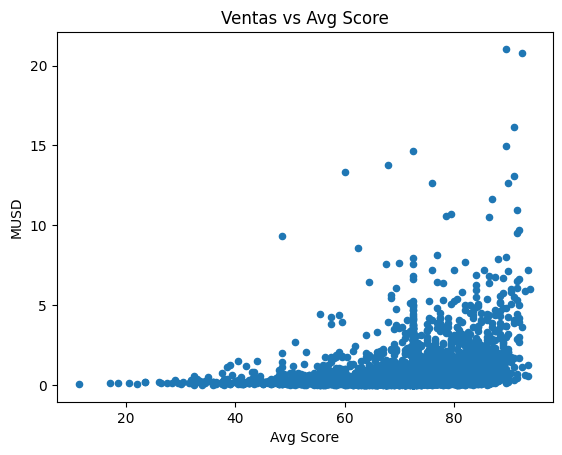

In [57]:
#Grafico de dispersion de correlacion entre ventas y Avg Score
df_games_playstation_score.plot(
		kind = 'scatter',
		title = 'Ventas vs Avg Score',
		xlabel = 'Avg Score',
		ylabel = 'MUSD',
        x = 'avg_score',
        y = 'total_sales'
)

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas.  Solamente para completar este análisis de la relación de las score promedio de criticos y usuarios, te recomiendo desarrollar un par de grafifcas complementar que muestren la realción individual de estas score con las ventas
</div>

**Comments**: Se segmenta el analisis solo tomando en cuenta a la plataforma con mas ventas y estabilidad en el mercado, PlayStation.
- Existe una correlacion positiva baja (.296) entre el avg_score y las ventas totales de la plataforma. 
- Sin embargo es importante destacar que hay muy pocos casos de juegos con una critica promedio menor o igual a 60 que hayan alcanzado ventas mayores a 5MUSD (2).

### Top juegos publicados en diferentes plataformas

In [58]:
# Identificacion de juegos publicados en diferentes plataformas
df_same_game_dif_platform = df_games_ok.query("year_of_release != -1 and year_of_release >= 1994 and year_of_release <= 2015")
df_same_game_dif_platform['name'].value_counts(ascending=False)

need for speed: most wanted        12
fifa 14                             9
ratatouille                         9
lego marvel super heroes            9
lego jurassic world                 8
                                   ..
magician's quest: town of magic     1
ace combat 5: the unsung war        1
mystery tales of time travel        1
arcade party pak                    1
rugby league team manager 2015      1
Name: name, Length: 10839, dtype: int64

In [59]:
#Comparacion de venta del juego Need for speed en diferentes plataformas
df_need_for_speed = df_same_game_dif_platform.query("name == 'need for speed: most wanted'")
df_pivot_need_for_speed = df_need_for_speed.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(df_pivot_need_for_speed)

          total_sales
platform             
PS2              4.37
PS3              2.81
X360             2.81
XB               1.04
PSV              1.01
GC               0.56
PC               0.37
DS               0.27
WiiU             0.27
GBA              0.26


<AxesSubplot:title={'center':'Need_for_speed ventas por plataforma'}, xlabel='Platform', ylabel='MUSD'>

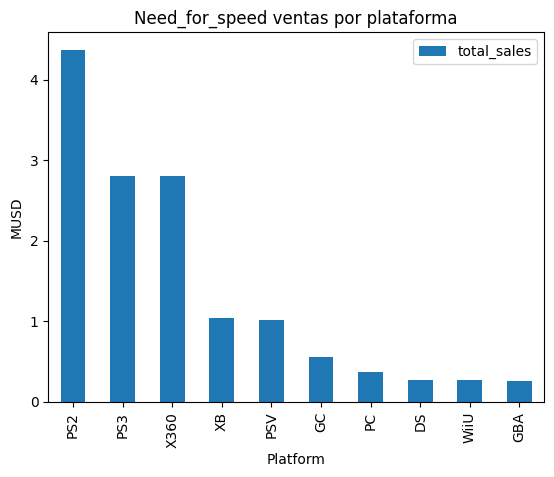

In [60]:
#Grafico de venta de Need for speed
df_pivot_need_for_speed.plot(
	kind = 'bar',
	title = 'Need_for_speed ventas por plataforma',
	xlabel = 'Platform',
	ylabel = 'MUSD',
)

In [61]:
#Comparacion de venta del juego Ratatouille en diferentes plataformas
df_ratatouille = df_same_game_dif_platform.query("name == 'ratatouille'")
df_pivot_ratatouille = df_ratatouille.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
print(df_pivot_ratatouille)

          total_sales
platform             
DS               1.25
PS2              0.84
PSP              0.65
PS3              0.51
Wii              0.50
X360             0.27
GBA              0.19
GC               0.14
PC               0.02


<AxesSubplot:title={'center':'Ratatouille ventas por plataforma'}, xlabel='Platform', ylabel='MUSD'>

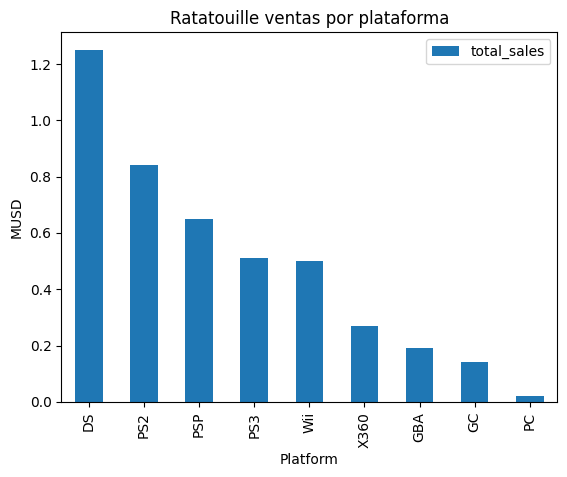

In [62]:
#Grafico de venta de Ratatouille
df_pivot_ratatouille.plot(
	kind = 'bar',
	title = 'Ratatouille ventas por plataforma',
	xlabel = 'Platform',
	ylabel = 'MUSD',
)

**Comments**: se identificaron los juegos mas populares publicados en diferentes plataformas y se analizaron sus ventas.
- Se encontro que los dos juegos mas populares por este criterio fueron Need for Speed y Ratatouille.
- Sin embargo se identifica que a pesar de ser los dos mas populares, su comportamiento en ventas dista mucho uno del otro.
- Por una parte Need for Speed alcanzo ventas mayores a 1MUSD en 5 plataformas diferentes, en 3 versiones diferentes de PlayStation y 2 de XBox.
- Mientras que Ratatouille solo alcanzo ventas mayores a 1MUSD en una plataforma (DS), propiedad de Nintendo. 

### Rentabilidad por genero

In [63]:
# Identificacion de cantidad de juegos por tipo de Genre
df_genre = df_games_ok.query("year_of_release != -1 and year_of_release >= 1994 and year_of_release <= 2015")
df_genre_count = df_genre['genre'].value_counts(ascending=False)
print(df_genre_count)

Action          3048
Sports          2211
Misc            1675
Role-Playing    1397
Adventure       1228
Shooter         1211
Racing          1187
Simulation       831
Platform         804
Fighting         798
Strategy         651
Puzzle           535
Name: genre, dtype: int64


In [64]:
#Ratio de total sales por cantidad de juegos por genre
df_pivot_genre = df_genre.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
df_genre_merged = pd.concat([df_pivot_genre,df_genre_count], axis='columns')
df_genre_merged['avg_sales'] = df_genre_merged['total_sales']/df_genre_merged['genre']
print(df_genre_merged.sort_values(by='avg_sales', ascending=False))


              total_sales  genre  avg_sales
Platform           637.36    804   0.792736
Shooter            938.02   1211   0.774583
Role-Playing       877.42   1397   0.628074
Racing             691.80   1187   0.582814
Sports            1243.24   2211   0.562298
Action            1616.51   3048   0.530351
Fighting           406.58    798   0.509499
Misc               773.93   1675   0.462048
Simulation         379.95    831   0.457220
Puzzle             159.89    535   0.298860
Strategy           169.32    651   0.260092
Adventure          210.17   1228   0.171148


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Angel, el error acá sale dado que estamos intentando hacer el merge por columnas que diferentes tipos de datos. Por ejemplo en el error marca que son object y int. En este sentido verifica que el tipo de variable es el mismo

</div>

<div class="alert alert-block alert-info">
    <b>Respuesta del estudiante:</b> <a class="tocSkip"></a>
    
Se segmentan los datos con ventas desde 2010 y se realiza grafica de tendencia de ventas por plataforma 2010-2016.


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con la gráfica de 2010 a 2016

**Comments**: se identificaron las ventas totales y la cantidad de juegos publicados por genero.
- Se encontro que los juegos que han generado mas ventas son los de Action y Sports, sin embargo tambien son los mas publicados.
- Por lo que se genero un 'Ratio' identificando que los juegos mas rentables son los de Platform, Shooter y Role-Playing con ventas por juego por encima de los .6MUSD.

### Plataformas principales por Region

In [65]:
#Agrupado de datos por platform por region
df_sales_filtered = df_games_ok.query("year_of_release != -1 and year_of_release >= 1994 and year_of_release <= 2015")
df_platform_region = df_sales_filtered.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()
df_platform_region

,na_sales,eu_sales,jp_sales
platform,,,
3DO,0.00,0.00,0.10
3DS,78.51,58.94,92.59
DC,5.43,1.69,8.56
DS,380.31,188.41,175.00
GB,56.24,33.87,56.39
GBA,184.12,74.59,46.56
GC,131.94,38.32,21.34
GEN,5.21,1.68,0.93
N64,138.91,41.03,33.76


In [66]:
#Obtener el porcentaje de participacion por plataforma del total por region
df_platform_region_perc = df_platform_region/df_platform_region.sum(axis=0)*100
df_platform_region_perc

,na_sales,eu_sales,jp_sales
platform,,,
3DO,0.000000,0.000000,0.009217
3DS,1.975790,2.574575,8.534112
DC,0.136652,0.073821,0.788984
DS,9.570918,8.229991,16.129924
GB,1.415341,1.479485,5.197522
GBA,4.633582,3.258187,4.291482
GC,3.320415,1.673867,1.966929
GEN,0.131115,0.073385,0.085719
N64,3.495822,1.792243,3.111693


In [67]:
#Identificacion de top 5 plataformas por region segun su porcentaje de participacion
print(df_platform_region_perc['na_sales'].sort_values(ascending=False).head(5))
print()
print(df_platform_region_perc['eu_sales'].sort_values(ascending=False).head(5))
print()
print(df_platform_region_perc['jp_sales'].sort_values(ascending=False).head(5))

platform
X360    14.975086
PS2     14.418160
Wii     12.251107
PS3      9.801188
DS       9.570918
Name: na_sales, dtype: float64

platform
PS2     14.529705
PS3     14.237478
X360    11.689548
Wii     11.278944
PS       9.277468
Name: eu_sales, dtype: float64

platform
DS     16.129924
PS     12.883662
PS2    12.677199
3DS     8.534112
PS3     7.199476
Name: jp_sales, dtype: float64


**Comment**: Se agruparon los valores de ventas de cada una de las regiones por plataforma para despues sacar el porcentaje de participacion por cada una y obtener el top 5 de ventas por region.
- Para NA, hay una mayor variacion en cuanto a las plataformas preferidas por el publico ya que 2 son de PlayStation, 2 de Nintendo y una de Xbox, sin embargo X360 es la plataforma lider.
- Para EU, se muestra una clara tendencia mayoritaria hacia PlayStation ya que 3 de las 5 pertenecen a esta compañia, siendo la lider PS2.
- Para JP, a pesar de PlaySatation estar presente en 3 de las 5, la plataforma lider es DS de Nintendo, teniendo tambien dentro del top 5 3DS que no estaba presente en ninguna otra region. Cabe descatar que no se presentan plataformas de Xbox en el top 5.

### Generos principales por Region

In [68]:
#Agrupado de datos por genre por region
df_genre_region = df_sales_filtered.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
df_genre_region

,na_sales,eu_sales,jp_sales
genre,,,
Action,805.39,492.79,140.23
Adventure,90.97,58.24,45.37
Fighting,206.27,94.14,71.36
Misc,393.16,209.03,98.93
Platform,332.42,174.37,83.96
Puzzle,71.27,42.73,35.10
Racing,342.09,228.55,46.85
Role-Playing,322.52,183.80,314.79
Shooter,515.06,294.90,30.67


In [69]:
#Obtener el porcentaje de participacion por genero del total por region
df_genre_region_perc = df_genre_region/df_genre_region.sum(axis=0)*100
df_genre_region_perc

,na_sales,eu_sales,jp_sales
genre,,,
Action,20.268522,21.525700,12.925139
Adventure,2.289360,2.543998,4.181798
Fighting,5.191011,4.112156,6.577322
Misc,9.894302,9.130699,9.118477
Platform,8.365714,7.616705,7.738677
Puzzle,1.793588,1.866501,3.235202
Racing,8.609070,9.983357,4.318211
Role-Playing,8.116569,8.028620,29.014508
Shooter,12.962050,12.881611,2.826884


In [70]:
#Identificacion de top 5 generos por region segun su porcentaje de participacion
print(df_genre_region_perc['na_sales'].sort_values(ascending=False).head(5))
print()
print(df_genre_region_perc['eu_sales'].sort_values(ascending=False).head(5))
print()
print(df_genre_region_perc['jp_sales'].sort_values(ascending=False).head(5))

genre
Action     20.268522
Sports     16.358718
Shooter    12.962050
Misc        9.894302
Racing      8.609070
Name: na_sales, dtype: float64

genre
Action     21.525700
Sports     15.545295
Shooter    12.881611
Racing      9.983357
Misc        9.130699
Name: eu_sales, dtype: float64

genre
Role-Playing    29.014508
Action          12.925139
Sports          10.011614
Misc             9.118477
Platform         7.738677
Name: jp_sales, dtype: float64


**Comment**: Se agruparon los valores de ventas de cada una de las regiones por genero para despues sacar el porcentaje de participacion por cada uno y obtener el top 5 de ventas por region.
- Para NA y EU, la tendecia de ventas en cuanto a generos es muy similar. Son los mismos 5 generos con muy similares proporciones los que destacan en ambas regiones, estando a la cabeza Action y Sports.
- Para JP, si varian los generos mas populares, entrando a la lista tanto Role-Playing (genero mas popular) y Platform. Repitiendo Action, Sports y Misc.

### Clasificaciones principales por Region

In [71]:
#Agrupado de datos por clasificacion por region
df_rating_region = df_sales_filtered.groupby('rating2')[['na_sales','eu_sales','jp_sales']].sum()
df_rating_region

,na_sales,eu_sales,jp_sales
rating2,,,
Adult Only,1.26,0.61,0.00
Everyone,1270.36,690.63,198.35
Everyone 10y+,341.69,179.52,39.75
Mature,727.20,463.46,62.38
Rating Pending,894.46,543.89,636.03
Teens,738.63,411.20,148.43


In [72]:
#Obtener el porcentaje de participacion por rating del total por region
df_rating_region_perc = df_rating_region/df_rating_region.sum(axis=0)*100
df_rating_region_perc

,na_sales,eu_sales,jp_sales
rating2,,,
Adult Only,0.031709,0.026646,0.000000
Everyone,31.970002,30.167605,18.282117
Everyone 10y+,8.599003,7.841664,3.663797
Mature,18.300785,20.244528,5.749627
Rating Pending,22.510066,23.757813,58.623518
Teens,18.588434,17.961744,13.680941


In [73]:
#Identificacion de top 5 clasificaciones por region segun su porcentaje de participacion
print(df_rating_region_perc['na_sales'].sort_values(ascending=False).head(5))
print()
print(df_rating_region_perc['eu_sales'].sort_values(ascending=False).head(5))
print()
print(df_rating_region_perc['jp_sales'].sort_values(ascending=False).head(5))

rating2
Everyone          31.970002
Rating Pending    22.510066
Teens             18.588434
Mature            18.300785
Everyone 10y+      8.599003
Name: na_sales, dtype: float64

rating2
Everyone          30.167605
Rating Pending    23.757813
Mature            20.244528
Teens             17.961744
Everyone 10y+      7.841664
Name: eu_sales, dtype: float64

rating2
Rating Pending    58.623518
Everyone          18.282117
Teens             13.680941
Mature             5.749627
Everyone 10y+      3.663797
Name: jp_sales, dtype: float64


**Comment**: Se agruparon los valores de ventas de cada una de las regiones por clasificacion para despues sacar el porcentaje de participacion por cada uno y obtener el top 5 de ventas por region.
- Para NA y EU, la tendecia de ventas en cuanto a clasificaciones de nuevo es muy similar. Son las mismas 5 clasificaciones con muy similares proporciones, estando a la cabeza Everyone y Rating Pending.
- Para JP, varia que la clasificacion lider es Rating Pending, pero por un margen significativamente mayor que las otras regiones, siendo casi 3 veces mayor que las otras dos regiones. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Prueba de Hipotesis

In [74]:
# Segmentacion de DataFrame para prueba de hipotesis
df_hipotesis = df_games_ok.query("year_of_release != -1 and year_of_release >= 1994 and year_of_release <= 2015").query("critic_score >= 0 and user_score >= 0")

### Prueba de hipotesis 1

In [75]:
#Calculo de varianza para valores de User_Score en XOne
np.var(df_hipotesis[df_hipotesis['platform'] == 'XOne']['user_score'])

140.11734375

In [76]:
#Calculo de varianza para valores de User_Score en PC
np.var(df_hipotesis[df_hipotesis['platform'] == 'PC']['user_score'])

179.02762152224167

In [77]:
# Prueba de Levene centrada en la mediana

alpha = 0.05 #nivel de significacion

st.levene(df_hipotesis[df_hipotesis['platform'] == 'XOne']['user_score'],
    df_hipotesis[df_hipotesis['platform'] == 'PC']['user_score'], center = 'median')

LeveneResult(statistic=0.06375059253812164, pvalue=0.800712501819048)

In [78]:
# Prueba de Levene centrada en la media

alpha = 0.05 #nivel de significacion

st.levene(df_hipotesis[df_hipotesis['platform'] == 'XOne']['user_score'],
    df_hipotesis[df_hipotesis['platform'] == 'PC']['user_score'], center = 'mean')

LeveneResult(statistic=0.6574747090441981, pvalue=0.4176359339223966)

In [79]:
# Prueba las hipótesis

#H0 = 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.'
#Ha = 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.'

alpha = 0.05 #nivel de significacion

result = st.ttest_ind(
    df_hipotesis[df_hipotesis['platform'] == 'XOne']['user_score'],
    df_hipotesis[df_hipotesis['platform'] == 'PC']['user_score'],
    equal_var = True
)
print("Valor p:",(result.pvalue * 100).round(5),'%')

Valor p: 0.00949 %


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(df_hipotesis[df_hipotesis['platform'] == 'XOne']['user_score'], df_hipotesis[df_hipotesis['platform'] == 'PC']['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
    <b>Respuesta del estudiante:</b> <a class="tocSkip"></a>
    
Se calculan las varianzas de todos los conjuntos de datos y se realiza la prueba de Levene como se recomienda para identificar el valor a poner en equal_var=True en la st.ttest_ind

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajustes! La prueba de levene nos ayuda a probar el supuesto de varianzas iguales
    
   

</div>

### Prueba de hipotesis 2

In [80]:
#Calculo de varianza para valores de User_Score en genero Action
np.var(df_hipotesis[df_hipotesis['genre'] == 'Action']['user_score'])

117.27796033369845

In [81]:
#Calculo de varianza para valores de User_Score en genero Sports
np.var(df_hipotesis[df_hipotesis['genre'] == 'Sports']['user_score'])

123.31098056037808

In [85]:
# Prueba de Levene centrada en la mediana

alpha = 0.04 #nivel de significacion

st.levene(df_hipotesis[df_hipotesis['genre'] == 'Action']['user_score'],
    df_hipotesis[df_hipotesis['genre'] == 'Sports']['user_score'], center = 'median')

LeveneResult(statistic=1.8926057513056567, pvalue=0.16896692063915866)

In [86]:
# Prueba de Levene centrada en la media

alpha = 0.04 #nivel de significacion

st.levene(df_hipotesis[df_hipotesis['genre'] == 'Action']['user_score'],
    df_hipotesis[df_hipotesis['genre'] == 'Sports']['user_score'], center = 'mean')

LeveneResult(statistic=0.3409014025496261, pvalue=0.5593344271992443)

In [84]:
# Prueba las hipótesis

#H0 = 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.'
#Ha = 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.'

alpha = 0.05 #nivel de significacion

result = st.ttest_ind(
    df_hipotesis[df_hipotesis['genre'] == 'Action']['user_score'],
    df_hipotesis[df_hipotesis['genre'] == 'Sports']['user_score'],
    equal_var = True
)
print("Valor p:",(result.pvalue * 100).round(5),'%')

Valor p: 90.49655 %


**Comments**: se generan dos pruebas de hipotesis, debido a que en ambas se busca comparar la igualdad de las medias entre dos poblaciones estadisticas, se procede a aplicar la prueba de dos muestras con la funcion scipy.stats.ttest_ind y se establece un umbral alpha de 0.05.
- Para el caso de comparar las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, se define como hipotesis nula que son las mismas, e hipotesis alternativa que son diferentes. Se descarta la hipotesis nula por el valor P obtenido de .001%.
- Para el caso de comparar las calificaciones promedio de los usuarios para los géneros de Acción y Deportes, se define como hipotesis nula que son las mismas, e hipotesis alternativa que son diferentes. No se descarta la hipotesis nula por el valor P obtenido de 86.4%.

### Conclusion General

Para este proyecto se realizaron los siguientes pasos:
1) **Carga del conjunto de datos:**
    - *games.csv:* datos generales sobre los juegos, ventas por region, scores de critica y usuarios.
2) **Procesamiento de los datos.**
    - *Columna Name:* los valores ausentes son los mismos que la columna 'Genre', no se cuentan con valores de Critica, Usuario ni Rating, y son juegos de 1993, fueron eliminados.
    - *Columna Platform:* se agrupan las plataformas en funcion de las diferentes compañias de videojuegos.
    - *Columna Year of release:* se asigna un 'valor absurdo' en los datos ausentes para cambiar el tipo de dato de flotante a entero. 
    - *Columna Genre:* no se realiza ningun cambio o ajuste.
    - *Columnas Sales:* se genera una nueva columna con la suma de las ventas de las 3 regiones.
    - *Columna Critic Score:* se mantienen los valores NaN ya que se infieren como juegos que no se calificaron en su momento.
    - *Columna User Score:* se cambian los valores tbd a NaN, ya que se infieren como juegos que no se clasificaron. Se cambia el tipo de dato de objeto a flotante. Se realiza la multiplicacion por 10 de los valores para que tengan la misma base 1/100 que los valores de critic_score.
    - *Columna Rating:* se cambian los valores ausentes por 'Rating Pending'. Se decide generar una nueva columna con la descripcion completa del significado de los rating.
    - *Revision de duplicados:* no se presentan duplicados de lineas enteras. Se elimina la unica file con valores duplicados en nombre, plataforma y año de release.
    - *Se guarda la tabla procesada como:* games_processed.csv.
3) **Analisis exploratorio.**
    - *Publicacion de juegos por año:* se analiza desde el año 1980, encontrando una tendencia de crecimiento a partir del año 1995. Hubo un crecimiento exponencial a partir del 2005-2006 con una caida significativa en el 2008-2009. En el 2008 hubo una crisis economica mundial que seguramente tambien impacto en el mundo de los videojuegos. 
    - *Ventas totales por plataforma:* se muestra un grafico lineal con las tendencias de venta por plataforma, identificando que la duracion de vida y ventas de las plataformas es entre 8 y 12 años, con un tiempo de traslape entre consolas de la misma compañia de entre 4 y 6 años.
    - *Top 3 ventas por compañia:* Nintendo muestra un crecimiento constante, despues un repunte exponencial en 2005, y cae abruptamente a partir del 2009. XBox inicia en el 2000, con un crecimiento paulatino con un pico en 2010, seguido de caida constante. PlayStation se muestra con mayores ventas y estabilidad, teniendo un crecimiento desde su aparicion, manteniendose en ventas superiores a los 100MUSD desde 1997 hasta el 2015.
    - *Analisis de correlacion Ventas-Score PlayStation:* existe una correlacion positiva baja (.296) entre el avg_score y las ventas totales de la plataforma. Hay muy pocos casos de juegos con una critica promedio menor o igual a 60 que hayan alcanzado ventas mayores a 5MUSD (2).
    - *Top juegos publicados en diferentes plataformas:* de los dos juegos mas populares, su comportamiento en ventas dista mucho uno del otro. Need for Speed alcanzo ventas mayores a 1MUSD en 5 plataformas diferentes, Ratatouille solo alcanzo ventas mayores a 1MUSD en 1 plataforma.
    - *Rentabilidad por genero:* los juegos mas rentables son Platform, Shooter y Role-Playing con ventas por juego por encima de los .6MUSD.
    - *Plataformas principales por region:* para NA X360 es la plataforma lider. Para EU la plataforma lider es PS2. Para JP, la plataforma lider es DS de Nintendo.
    - *Clasificaciones principales por region:* en NA y EU, las ventas por clasificacion son muy similar, estando a la cabeza Everyone y Rating Pending. Para JP, la clasificacion lider es Rating Pending por un margen casi 3 veces mayor que las otras dos regiones.
4) **Hipotesis**
    - Se descarta la hipotesis nula por el valor P obtenido de .001%. para el caso de comparar las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. 
    - No se descarta la hipotesis nula por el valor P obtenido de 86.6% para el caso de comparar las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. 


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Angel, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>